In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
%matplotlib inline
from PIL import Image
from skimage import io
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings; warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('CheXpert-v1.0-small/train.csv')
test_df = pd.read_csv('CheXpert-v1.0-small/test.csv')
train_df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

Pneumonia 8 	 non_Pneumonia 194 for testing


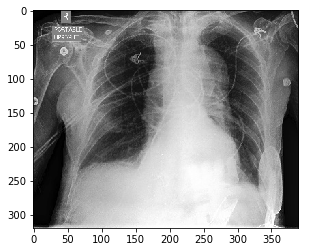

In [8]:
# # feature selection
# count1 = 0
# count2 = 0
# for i,pic in enumerate(test_df['Path']):
# #     img=Image.open(pic)
#     if test_df['Pneumonia'][i] == 1 and test_df['Frontal/Lateral'][i] == 'Frontal':
#         src = pic
#         shutil.copyfile(src, './images/Pneumonia/test_pne_%s.jpg'%i)
#         count1 += 1
#     elif test_df['Pneumonia'][i] == 0 and test_df['Frontal/Lateral'][i] == 'Frontal':
#         src = pic
#         shutil.copyfile(src, './images/non_Pneumonia/test_non_%d.jpg'%i)
#         count2 += 1
# print('Pneumonia',count1,'\t','non_Pneumonia',count2,'for testing')
# img=Image.open(pic)
# plt.imshow(img, cmap='gray')
# plt.show()

In [16]:
# # train_test_split
# path = './images/Pneumonia/'
# files = os.listdir(path)
# l = len(files)
# for i,pic in enumerate(files):
#     src = path + pic
#     if i <= 0.2 * l:
#         shutil.copyfile(src, './test2/Pneumonia/pne_%d.jpg'%i)
#     else:
#         shutil.copyfile(src, './train2/Pneumonia/pne_%d.jpg'%i)

In [3]:
# import skimage
# from skimage import morphology, io, color, exposure, img_as_float, transform

In [79]:
# def prue(pic):
#     img = pic
#     sr,sc = [],[]
#     for i in img:
#         if np.mean(i) != i[0]:
#             sr.append(i)
#     for i in np.array(sr).T:
#         if np.mean(i) != i[0]:
#             sc.append(i)
#     img = np.array(sc).T
#     return img

In [4]:
# def remove_small_regions(img, size):
#     """Morphologically removes small (less than size) connected regions of 0s or 1s."""
#     img = morphology.remove_small_objects(img, size)
#     img = morphology.remove_small_holes(img, size)
#     return img

In [5]:
# def rect(pr):
#     rectangle = np.zeros((256,256))
#     x = np.where(pr==True)[0]
#     y = np.where(pr==True)[1]
#     if x != np.array([]) and y != np.array([]):# if we don't get any information, we drop this image
#         x1 = x[np.argmin(x)]
#         x2 = x[np.argmax(x)]
#         y1 = y[np.argmin(y)]
#         y2 = y[np.argmax(y)]
#         for i in range(255):
#             for j in range(255):
#                 if ((i>x1)&(i<x2)&(j>y1)&(j<y2)):
#                     rectangle[i,j] = 1
#     return rectangle

In [6]:
# import keras.backend as K
# from keras.models import load_model
# K.clear_session()
# model_name = './lung-segmentation-2d/trained_model.hdf5'
# UNet = load_model(model_name)

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [41]:
# path = './train2/non_Pneumonia/' 
# files= os.listdir(path)
# s = 0
# X = []
# # if not os.path.isdir(file):
# for i,file in enumerate(files): 
#     if i > 9000:
#             im_shape = (256, 256)
#             img = img_as_float(io.imread(path + file))
#             img = transform.resize(img, im_shape)
# #             plt.imshow(img)
#             img = exposure.equalize_hist(img)
#             img = np.expand_dims(img, -1)
#             X.append(img)
#             s += 1
#     else:
#         pass
# print('we get',s,'images for Pneumonia in total')
# X = np.array(X)
# X -= X.mean()
# X /= X.std()
# X.shape
# inp_shape = X[0].shape
# print(X.shape)

3937


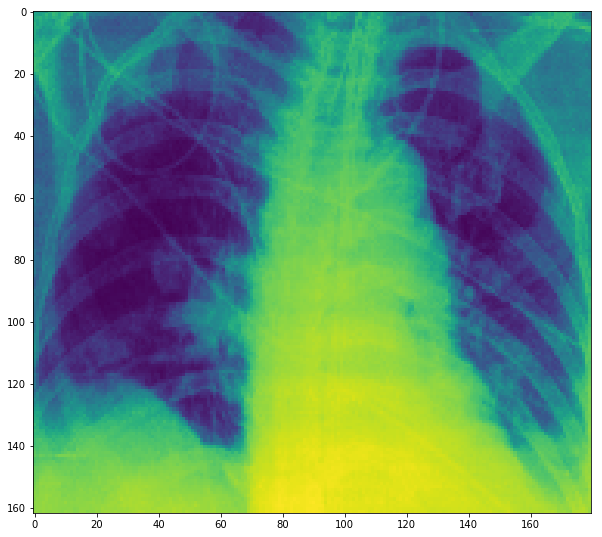

In [40]:
# import scipy.misc
# s = 0
# plt.figure(figsize=(10, 10))
# for a, xx in enumerate(X):
#     xx1=xx[None,:,:,:]
#     pred = UNet.predict(xx1)[..., 0].reshape(inp_shape[:2])
#     pr = pred > 0.8
#     pr = remove_small_regions(pr, 0.02 * np.prod(im_shape))
#     src = rect(pr)*xx.reshape(256,256)
#     sr,sc = [],[]
#     for i in src:
#         if sum(i) != 0:
#             sr.append(i)
#     for i in np.array(sr).T:
#         if sum(i) != 0:
#             sc.append(i)
#     pic = np.array(sc).T
#     if pic.shape == (0,):
#         pass
#     else:
#         scipy.misc.imsave('./train3/non_Pneumonia/train_non%d.jpg'%(a+9000), pic)
#         s += 1
# plt.imshow(pic)
# print(s)

In [8]:
#we have to do data augmentation for test data

In [56]:
def Aug(path):
    path1 = "Pneumonia/"
    path2 = "non_Pneumonia/"

    count1,count2 = 0,0
    ang1 = 30
#     if (not os.path.exists(path+'opt_dic/')):
#         os.mkdir(path+'opt_dic/')
#     if (not os.path.exists(path+'opt_dic/Pneumonia')):
#         os.mkdir(path+'opt_dic/Pneumonia')
#     if (not os.path.exists(path+'opt_dic/non_Pneumonia')):
#         os.mkdir(path+'opt_dic/non_Pneumonia')
    for filename in os.listdir(path+path1):              
        im = Image.open(path + path1 + filename[:-4] + '.jpg')
        im_rotate1 = im.rotate(360 - ang1)
        im_rotate2 = im.rotate(ang1)
        im_rotate1.save(path + path1 + filename[:-4] + '_l.jpg')
        im_rotate2.save(path + path1 + filename[:-4] + '_r.jpg')
        count1 += 3
    for filename in os.listdir(path + path2):              
        im = Image.open(path+path2 + filename[:-4]+'.jpg')
        im_rotate1 = im.rotate(360 - ang1)
        im_rotate2 = im.rotate(ang1)
        im_rotate1.save(path + path2 + filename[:-4] +'_l.jpg')
        im_rotate2.save(path + path2 + filename[:-4] +'_r.jpg')
        count2 += 3
    count = count1 + count2
    print('By augmentation, we got',count,'images in total')

In [57]:
Aug('./test3/')

By augmentation, we got 87612 images in total


In [3]:
import keras.backend as K
from keras.models import load_model
K.clear_session()

Using TensorFlow backend.


In [36]:
nrow, ncol = 224,224
batch_size = 64
ntr = 2000
nts = 400

In [5]:
input_shape = (nrow,ncol,3)
base_model = applications.VGG19(weights='imagenet', include_top = False, input_shape = input_shape)
model = Sequential()
for layer in base_model.layers:
    model.add(layer)

In [6]:
for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [65]:
train_data_dir = './train3'
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size = (nrow,ncol),batch_size = batch_size,class_mode = 'binary')
test_data_dir = './test3'
test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size = (nrow,ncol),batch_size = batch_size,class_mode = 'binary')

Found 16677 images belonging to 2 classes.
Found 4172 images belonging to 2 classes.


In [66]:
# train_data_dir = './train2'
# train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
# train_generator = train_datagen.flow_from_directory(train_data_dir,target_size = (nrow,ncol),batch_size = batch_size,class_mode = 'binary')
# test_data_dir = './test2'
# test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
# test_generator = test_datagen.flow_from_directory(test_data_dir,target_size = (nrow,ncol),batch_size = batch_size,class_mode = 'binary')

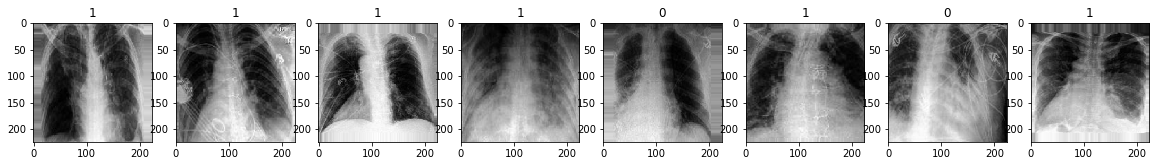

In [67]:
X,y = train_generator.next()
nplot = 8
plt.figure(figsize = (20,20))
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    plt.title(int(y[i]))
    plt.imshow(X[i], cmap='gray')

In [68]:
steps_per_epoch = ntr // batch_size
validation_steps = nts// batch_size

lr = 1e-3
decay = 1e-4
n_epochs = 5

opt = optimizers.RMSprop(lr = lr,decay = decay)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(train_generator,steps_per_epoch = steps_per_epoch,epochs = n_epochs,validation_data = test_generator,validation_steps = validation_steps)

Epoch 1/5
31/31 [==============================] - 27s 883ms/step - loss: 0.5297 - acc: 0.7873 - val_loss: 0.5188 - val_acc: 0.7812
Epoch 2/5
31/31 [==============================] - 23s 734ms/step - loss: 0.5585 - acc: 0.7631 - val_loss: 0.5260 - val_acc: 0.7812
Epoch 3/5
31/31 [==============================] - 25s 802ms/step - loss: 0.5403 - acc: 0.7737 - val_loss: 0.5190 - val_acc: 0.7812
Epoch 4/5
31/31 [==============================] - 23s 740ms/step - loss: 0.5474 - acc: 0.7650 - val_loss: 0.5304 - val_acc: 0.7812
Epoch 5/5
31/31 [==============================] - 23s 737ms/step - loss: 0.5506 - acc: 0.7671 - val_loss: 0.5233 - val_acc: 0.7812


In [58]:
# steps_per_epoch = ntr // batch_size
# validation_steps = nts// batch_size
# nepochs = 5

# lr = [1e-3, 1e-4, 1e-5]
# decay = [1e-3, 1e-4, 1e-5]
# hist = []

# for i in range(3):
#     opt[i] = optimizers.RMSprop(lr = lr[i],decay = decay[i])
#     model.compile(optimizer=opt[i], loss='binary_crossentropy', metrics=['accuracy'])
#     hist.append(model.fit_generator(train_generator,steps_per_epoch = steps_per_epoch,epochs = nepochs,validation_data = test_generator,validation_steps = validation_steps))

TypeError: 'RMSprop' object does not support item assignment

In [63]:
# val_acc doesn't change which means our model is overfitting may need to dropout some feature

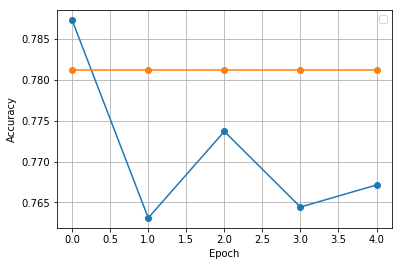

In [69]:
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.plot(hist.history['acc'], 'o-')
plt.plot(hist.history['val_acc'], 'o-')